# Analyzing Twitter Data

In this project, we wrangle the **WeRateDogs** Twitter data to create interesting and trustworthy analyses and visualizations.

# Dataset Description

1. **twitter-archive-enhanced.csv :** basic information regarding tweets on different dog stages.

2. **image-predictions.tsv:** prediction of dog breeds from images through Deep Learning algorithm.

3. **tweet-json.txt:** tweet data collected using. twitter API

# Data Wrangling

In [1]:
# Reading prediction file programmatically
import requests 
import pandas as pd
response = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)
#Read TSV file
pred = pd.read_csv('image-predictions.tsv', sep='\t' )
pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


**Quality Issues:**

1. We will consider the most liklihood prediction as it has the highest chances of being correct. So we do not need other prediction columns, it will reduce space and no. of features of our data and make it cleaner.

2. We not need the **img_num** feature as it is irrelevant for our analysis of **WeRateDogs** Twitter data. Since we are more interested in dog breeds, stages, popularity of post, rating of post etc. Whether the post had 1 or more pictures (*which is what **img_num** denotes*) is irrelevant.

**Tidliness Issue:**

This data is quite tidy.

In [2]:
# checking datatype and missing values
pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [3]:
# Checking unique values of p1_dog column
pred.p1_dog.unique()

array([ True, False])

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


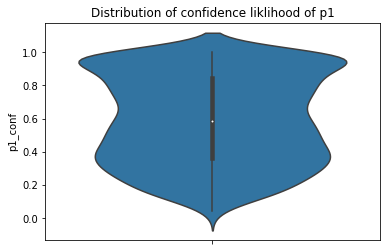

In [4]:
import seaborn as sns
ax=sns.violinplot(data=pred,y='p1_conf')
t=ax.set_title('Distribution of confidence liklihood of p1')

In [5]:
# choosing the final features to use
pred1=pred.iloc[:,:6].drop(['img_num'],axis=1)

In [6]:
pred1.head()

,tweet_id,jpg_url,p1,p1_conf,p1_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311,True


In [7]:
# Reading WeRateDogs archived twitter data
ta=pd.read_csv('twitter-archive-enhanced.csv')
ta.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [8]:
ta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [9]:
# Checking the unique values of puppo column
ta.puppo.unique()

array(['None', 'puppo'], dtype=object)

As we can see that in **puppo** column there are two values- **None** and **puppo**. puppo must be present in those rows where the stage of the dog is **poppo** otherwise **None**.

Same must be true for other 3 stages also.

In [10]:
# Deleting the retweets
ta=ta[ta.retweeted_status_id.isnull()]
ta.shape

(2175, 17)

In [11]:
# Checking the counts of different names of the dogs given by their owner.
ta.name.value_counts()

None       680
a           55
Lucy        11
Charlie     11
Cooper      10
          ... 
Blipson      1
Wiggles      1
Hazel        1
Sobe         1
Jarod        1
Name: name, Length: 956, dtype: int64

single letter '**a**' or others cannot be somebody's name. It might be a typo. So we will convert all the single-lettered word to None as None denotes name of dog not specified.

In [12]:
# converting single-lettered names
import numpy as np
k=[]
for i in range(len(ta)):
  if len(ta.iloc[i,-5])<=1:
    k.append('None')
  else:
    k.append(ta.iloc[i,-5])
print(k)
ta['name']=k

['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax', 'None', 'Zoey', 'Cassie', 'Koda', 'Bruno', 'None', 'Ted', 'Stuart', 'Oliver', 'Jim', 'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'such', 'Canela', 'None', 'None', 'Maya', 'Mingus', 'Derek', 'Roscoe', 'None', 'Waffles', 'Jimbo', 'Maisey', 'None', 'None', 'Earl', 'Lola', 'Kevin', 'None', 'None', 'Yogi', 'Noah', 'Bella', 'Grizzwald', 'None', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'None', 'None', 'Elliot', 'Louis', 'None', 'Bella', 'Jesse', 'None', 'Romeo', 'None', 'Bailey', 'Duddles', 'Jack', 'Steven', 'Beau', 'Snoopy', 'None', 'Shadow', 'Emmy', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'None', 'Benedict', 'Venti', 'Goose', 'Nugget', 'None', 'None', 'Cash', 'Jed', 'None', 'Sebastian', 'None', 'Sierra', 'None', 'None', 'Monkey', 'None', 'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'None', 'Boomer', 'None', 'None', 'Cody', 'Zoey', 'Rumble', 'Clifford', 'Dewey', 'Stanley', 'Scout', 'Gizmo', 'Walter', 'None

In [13]:
# checking the text messages of few posts.
ta.text.unique()

array(["This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
       "This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",
       'This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB',
       ...,
       'Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR',
       'This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI',
       'Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj'],
      dtype=object)

We can see that the text contains ratings and urls associated. But we already have separate columns for hem so they are irrelevant.

**Quality ISSUES:**

1. **timestamp** is not in datetimeindex format. But we need not change the type here. Once we make our final dataframe by appending all the parts together we can make the change there.

2. No need for four different columns **doggo, floofer, pupper, puppo**, we can create one column and write name or number corresponding to dog stage. Currently, It unnecessarily consumes more space and degrades quality of data.

3. Judging from the name column, there are values like **None** or **a** which are not related to dog or not named correctly.

4. The text columns have the ratings and url, but they are not necessary there as already separate columns are present for them. So we can omit them to make processing the text easier.

5. The rating values are out of 10 so rating_denominator should have all the values equal to 10 but there are some other values also. We need to comvert all to 10. We may also remove the column as we know all the values will be same. So keeping it is memory-wastage, irrelevant.

6. There are many **missing values** which needs to be taken care.

7. We have to take care we do not take ***retweets*** into acccount while analyzing rating.

**Tidliness Issue:**

1. Too many unnecessary columns which are irrelevant for our analysis, and even many of them contains null values. We need to remove those data to make data look compact and tidier.

In [14]:
# Removing ratings and url from text
pd.options.display.max_colwidth=200
ta[['text1','text2']]=ta.text.str.extract('([*A-Za-z.\',:; ]+)\d+\/\d+([*A-Za-z.\',; ]+)')
ta['text2']=ta['text2'].str.replace('https','')
ta['text']=ta['text1']+ta['text2']
ta.drop(['text1','text2'],axis=1,inplace=True)

In [15]:
# checking some of the given urls.
ta.expanded_urls.unique()

array(['https://twitter.com/dog_rates/status/892420643555336193/photo/1',
       'https://twitter.com/dog_rates/status/892177421306343426/photo/1',
       'https://twitter.com/dog_rates/status/891815181378084864/photo/1',
       ...,
       'https://twitter.com/dog_rates/status/666033412701032449/photo/1',
       'https://twitter.com/dog_rates/status/666029285002620928/photo/1',
       'https://twitter.com/dog_rates/status/666020888022790149/photo/1'],
      dtype=object)

The urls look fine and valid.

In [16]:
# Removing denominator_rating column as we already know all  the values will be 10 so it's a irrelevant column
ta.drop(['rating_denominator'],axis=1,inplace=True)

In [17]:
# Converting the columns for each stage of dog to a single column only. The datapoints where no stages are mentioned we denote with '0'
l1=[]
for i in range(len(ta)):
  if ta.iloc[i,-4]=='doggo':
    l1.append('doggo')
  elif ta.iloc[i,-3]=='floofer':
    l1.append('floofer')
  elif ta.iloc[i,-2]=='pupper':
    l1.append('pupper')
  elif ta.iloc[i,-1]=='puppo':
    l1.append('puppo')
  else:
    l1.append('0')
ta['stage']=l1
ta.drop(['doggo','floofer','pupper','puppo'],axis=1,inplace=True)

In [18]:
# Choosing only the relevant columns for analysis and dropping rest
ta1=ta[['tweet_id','timestamp','text','expanded_urls','rating_numerator','name','stage']]

In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer


consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)


tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [19]:
tweet=pd.read_json('tweet-json.txt',lines=True)
tweet.head(3)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media...","{'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com...","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™ (author)', 'screen_name': 'dog_rates', 'location': 'DM YOUR DOGS, WE WILL RATE', 'description': '#1 Source for Professional Dog Rati...",NaN,NaN,None,NaN,False,8853,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/medi...","{'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'media_url_https': 'https://pbs.twimg.co...","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™ (author)', 'screen_name': 'dog_rates', 'location': 'DM YOUR DOGS, WE WILL RATE', 'description': '#1 Source for Professional Dog Rati...",NaN,NaN,None,NaN,False,6514,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 891815175371796480, 'id_str': '891815175371796480', 'indices': [122, 145], 'media_url': 'http://pbs.twimg.com/medi...","{'media': [{'id': 891815175371796480, 'id_str': '891815175371796480', 'indices': [122, 145], 'media_url': 'http://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg', 'media_url_https': 'https://pbs.twimg.co...","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™ (author)', 'screen_name': 'dog_rates', 'location': 'DM YOUR DOGS, WE WILL RATE', 'description': '#1 Source for Professional Dog Rati...",NaN,NaN,None,NaN,False,4328,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [20]:
# checking column data types and missing values
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [21]:
# Cecking the unique values for retweeted column
tweet.retweeted.unique()

array([False])

There is only False in retweeted column. So not tweet-person has retweeted his own post.

In [22]:
# Cecking the unique values for favorited column
tweet.favorited.unique()

array([False,  True])

In [23]:
# Choosing only the columns relevant to our analysis.
tw=tweet[['id','full_text','user','retweet_count','favorite_count','favorited','retweeted_status']]
tw.head()

,id,full_text,user,retweet_count,favorite_count,favorited,retweeted_status
0,892420643555336193,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™ (author)', 'screen_name': 'dog_rates', 'location': 'DM YOUR DOGS, WE WILL RATE', 'description': '#1 Source for Professional Dog Rati...",8853,39467,False,NaN
1,892177421306343426,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV","{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™ (author)', 'screen_name': 'dog_rates', 'location': 'DM YOUR DOGS, WE WILL RATE', 'description': '#1 Source for Professional Dog Rati...",6514,33819,False,NaN
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™ (author)', 'screen_name': 'dog_rates', 'location': 'DM YOUR DOGS, WE WILL RATE', 'description': '#1 Source for Professional Dog Rati...",4328,25461,False,NaN
3,891689557279858688,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™ (author)', 'screen_name': 'dog_rates', 'location': 'DM YOUR DOGS, WE WILL RATE', 'description': '#1 Source for Professional Dog Rati...",8964,42908,False,NaN
4,891327558926688256,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™ (author)', 'screen_name': 'dog_rates', 'location': 'DM YOUR DOGS, WE WILL RATE', 'description': '#1 Source for Professional Dog Rati...",9774,41048,False,NaN


In [24]:
# Renaming id column to tweet_id. Later will be helpful for merging dataframes.
tw.rename(columns={'id':'tweet_id'},inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [25]:
# Deleting data for all the retweeted tweets
tw=tw[tw.retweeted_status.isnull()]
len(tw)

2175

In [26]:
# We will extract the user id from user column
tw['user']=tw['user'].astype(str)
tw['user']=tw.user.str.extract('(\d{1,})')
tw['user'].value_counts()

4196983835    2175
Name: user, dtype: int64

We see that there is only a single user id. Obviously the posted are made by the twitter channel **WeRateDogs** only so there will be only one user id. So it's irrelevant to keep this column.

In [27]:
# drop user column
tw.drop('user',axis=1,inplace=True)

In [28]:
tw['favorited']=tw['favorited'].astype(str)

In [29]:
tw['favorited'].value_counts()

False    2169
True        6
Name: favorited, dtype: int64

In [ ]:
tw[tw['favorited']=='True']

,tweet_id,full_text,retweet_count,favorite_count,favorited,retweeted_status
21,887517139158093824,I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba,12082,46959,True,NaN
61,880095782870896641,Please don't send in photos without dogs in them. We're not @porch_rates. Insubordinate and churlish. Pretty good porch tho 11/10 https://t.co/HauE8M3Bu4,4533,28150,True,NaN
63,879674319642796034,@RealKentMurphy 14/10 confirmed,10,315,True,NaN
471,816450570814898180,Meet Moose. He doesn't want his friend to go back to college. 13/10 looks like you're staying home John https://t.co/LIhmM7i70k,9366,33961,True,NaN
787,774314403806253056,I WAS SENT THE ACTUAL DOG IN THE PROFILE PIC BY HIS OWNER THIS IS SO WILD. 14/10 ULTIMATE LEGEND STATUS https://t.co/7oQ1wpfxIH,6478,24167,True,NaN
1005,747600769478692864,This is Bookstore and Seaweed. Bookstore is tired and Seaweed is an asshole. 10/10 and 7/10 respectively https://t.co/eUGjGjjFVJ,619,2545,True,NaN


In [30]:
# favorited means the tweet is liked by user itself. This will not be considered as a valid like. We will only consider the likes given by other users. So we will
# substract 1 from the favorite_count column where there are favorited value is True
import numpy as np
tw[tw['favorited']=='True']
for i in range(len(tw)):
  if tw.iloc[i,4]=='True':
    tw.iloc[i,3]=tw.iloc[i,3]-1   

**Quality Issues:**

1. Too many duplicate columns. For eg: **geo** and **coordinates** denote the smae stuff. And even they do so, most of them has null values hence no use to us. So we remove such columns.

2. **id**, **id_str** denotes the same sthing only the former is in integer format and the latter is object. We keep the former one.

3. We will merge the three dataframes created so far, the date-time information(**timestamp**) column is present in of the dataframes created before so we need not incluse it in this dataframe.


**Tidliness Issue:**

1. Too many irrelevant columns making the dataframe huge and dirty. For eg: we don't need **display_text_range** column, it denotes the no. of character in the text columns which is not required for our analysis. Similarly, **quoted_status** and similar columns are not required. We are not interested if the text in post is a quote or not. So we need to remove them.

In [31]:
tw.drop(['favorited','retweeted_status'],axis=1,inplace=True)

**Tidliness Issue:**

1. So we have all the required data into 3 separate dataframe. We need to merge them into one.

In [32]:
# joining the final dataframes into one
df1=pd.merge(left=pred1,right=ta1,on='tweet_id',how='inner')
df2=pd.merge(left=df1,right=tw,how='inner',on='tweet_id')

In [33]:
df2.head()

,tweet_id,jpg_url,p1,p1_conf,p1_dog,timestamp,text,expanded_urls,rating_numerator,name,stage,full_text,retweet_count,favorite_count
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074,True,2015-11-15 22:32:08 +0000,. Big fan of relaxing on stair. would pet,https://twitter.com/dog_rates/status/666020888022790149/photo/1,8,None,0,Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,532,2535
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826,True,2015-11-15 23:05:30 +0000,dogs here. would walk the shit out of,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,None,0,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,48,132
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461,True,2015-11-15 23:21:54 +0000,maintained decks. Just look at that tongue. would cuddle af,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,None,0,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,47,128
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143,True,2015-11-16 00:04:52 +0000,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron.,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,None,0,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,147,311
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311,True,2015-11-16 00:24:50 +0000,st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased.,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,None,0,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,41,111


Now in the merged dataframe, we have two columns for urls - **jpg_url** and **expanded_urls**. Former denotes the link to image in the post and latter denotes the link to original post. Though both will have the same picture still lets recheck it.

We will two random samples of 5 datapoints and see if the both urls have same images.

We will check the contents of the two text columns **text** and **full_text** 
in the same manner.

In [34]:
df3=df2.sample(5,random_state=41)
for i,j in zip(df3['jpg_url'],df3['expanded_urls']):
  print(i,'          ',j)
  print('\n')

https://pbs.twimg.com/media/CY816snW8AYltrQ.jpg            https://twitter.com/dog_rates/status/688828561667567616/photo/1


https://pbs.twimg.com/media/CkZImGVUoAAwv0b.jpg            https://twitter.com/dog_rates/status/740359016048689152/photo/1


https://pbs.twimg.com/media/CUImtzEVAAAZNJo.jpg            https://twitter.com/dog_rates/status/667138269671505920/photo/1


https://pbs.twimg.com/media/CxvNfrhWQAA2hKM.jpg            https://twitter.com/dog_rates/status/800459316964663297/photo/1


https://pbs.twimg.com/media/Clb5pLJWMAE-QS1.jpg            https://twitter.com/dog_rates/status/745057283344719872/photo/1,https://twitter.com/dog_rates/status/745057283344719872/photo/1




In [35]:
for i,j in zip(df3['text'],df3['full_text']):
  print(i,'\t',j)
  print('\n')

Say hello to Brad. His car probably has a spoiler. Tan year round. Likes your insta pic but doesn't text back.   	 Say hello to Brad. His car probably has a spoiler. Tan year round. Likes your insta pic but doesn't text back. 9/10 https://t.co/dfCCK3tWfr


This is Chase. He's in a predicament.  help is on the way buddy  	 This is Chase. He's in a predicament. 9/10 help is on the way buddy https://t.co/0HmBk5sSbW


Extremely intelligent dog here. Has learned to walk like human. Even has his own dog. Very impressive   	 Extremely intelligent dog here. Has learned to walk like human. Even has his own dog. Very impressive 10/10 https://t.co/0DvHAMdA4V


Here's a very sleepy pupper. Appears to be portable as h*ck.  would snug intensely  	 Here's a very sleepy pupper. Appears to be portable as h*ck. 12/10 would snug intensely https://t.co/61sX7pW5Ca


This is Oliver. He's downright gorgeous as hell. Should be on the cover of Dogue.  would introduce to mom  	 This is Oliver. He's downright go

In [36]:
df3=df2.sample(5,random_state=47)
for i,j in zip(df3['jpg_url'],df3['expanded_urls']):
  print(i,'          ',j)
  print('\n')

https://pbs.twimg.com/media/CWT_lOQWUAAXPaY.jpg            https://twitter.com/dog_rates/status/676946864479084545/photo/1


https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg            https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1


https://pbs.twimg.com/media/Cf8qDFbWwAEf8M3.jpg            https://twitter.com/dog_rates/status/720340705894408192/photo/1


https://pbs.twimg.com/media/CVzRXmXWIAA0Fkr.jpg            https://twitter.com/dog_rates/status/674644256330530816/photo/1


https://pbs.twimg.com/media/CvLD-mbWYAAFI8w.jpg            https://twitter.com/dog_rates/status/788908386943430656/photo/1




In [37]:
for i,j in zip(df3['text'],df3['full_text']):
  print(i,'\t',j)
  print('\n')

This pups goal was to get all four feet as close to each other as possible. Valiant effort   	 This pups goal was to get all four feet as close to each other as possible. Valiant effort 12/10 https://t.co/2mXALbgBTV


When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy.   	 When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq


This is Derek. He just got balled on. Can't even get up. Poor thing.  hang in there pupper  	 This is Derek. He just got balled on. Can't even get up. Poor thing. 10/10 hang in there pupper https://t.co/BIRRF3bcWH


When you see sophomores in high school driving.   	 When you see sophomores in high school driving. 11/10 https://t.co/m6aC8d1Kzp


This is Lucy. She destroyed not one, but two remotes trying to turn off the debate.  relatable af  	 This is Lucy. She destroyed not one, but two remotes trying to turn off

We see(*by opening each url obtained from sampling*) that urls form both columns in the two samples have the same image, so we can drop one. Similarly, the two text columns have same contents so we can also drop one here.

In [38]:
# Dropping the required columns
df2.drop(['expanded_urls','full_text'],inplace=True,axis=1)

In [39]:
# Saving the final dataframe
df2.to_csv('twitter_archive_master.csv',index=None)

# Data Analysis & Visualization

In [40]:
# Reading the finalized, clean dataframe
import pandas as pd
df=pd.read_csv('twitter_archive_master.csv',parse_dates=['timestamp'])
df.head()

,tweet_id,jpg_url,p1,p1_conf,p1_dog,timestamp,text,rating_numerator,name,stage,retweet_count,favorite_count
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074,True,2015-11-15 22:32:08+00:00,. Big fan of relaxing on stair. would pet,8,None,0,532,2535
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826,True,2015-11-15 23:05:30+00:00,dogs here. would walk the shit out of,7,None,0,48,132
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461,True,2015-11-15 23:21:54+00:00,maintained decks. Just look at that tongue. would cuddle af,9,None,0,47,128
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143,True,2015-11-16 00:04:52+00:00,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron.,6,None,0,147,311
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311,True,2015-11-16 00:24:50+00:00,st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased.,5,None,0,41,111


In [41]:
df.shape

(1994, 12)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   tweet_id          1994 non-null   int64              
 1   jpg_url           1994 non-null   object             
 2   p1                1994 non-null   object             
 3   p1_conf           1994 non-null   float64            
 4   p1_dog            1994 non-null   bool               
 5   timestamp         1994 non-null   datetime64[ns, UTC]
 6   text              1962 non-null   object             
 7   rating_numerator  1994 non-null   int64              
 8   name              1994 non-null   object             
 9   stage             1994 non-null   object             
 10  retweet_count     1994 non-null   int64              
 11  favorite_count    1994 non-null   int64              
dtypes: bool(1), datetime64[ns, UTC](1), float64(1), int64(4), obje

We will only take into account of those datapoints which are concerned with dogs.

In [43]:
# Selecting rows only with dog tweets
df1=df.query('p1_dog==True')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


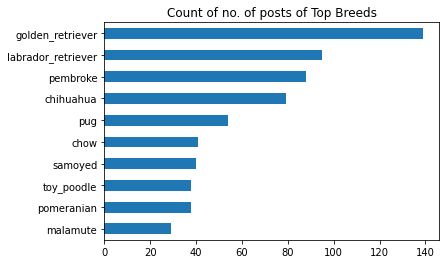

In [44]:
# First we will check the top 10 breeds with most number of posts
df1['p1']=df1['p1'].str.lower()
df1.p1.value_counts()[:10][::-1].plot(kind='barh',title='Count of no. of posts of Top Breeds')

**Golden retriever** has the highest no. of post followed by others.

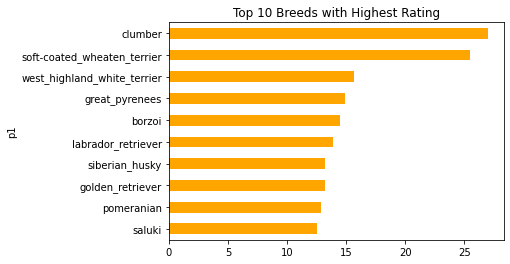

In [45]:
# Getting the breeds with highest average rating
df1.groupby('p1')['rating_numerator'].mean().reset_index().sort_values(by='rating_numerator',ascending=False)[:10][::-1].plot(kind='barh',x='p1',y='rating_numerator',legend=False,color='orange',title='Top 10 Breeds with Highest Rating')

**Clumber** has highest average rating followed by others.

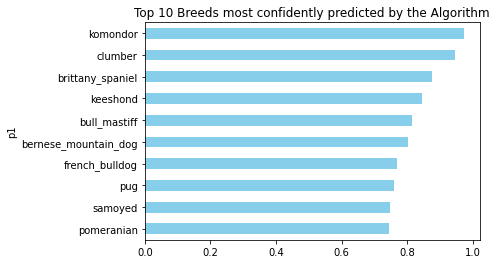

In [46]:
# Getting the top breeds with high confidence on the prediction by the algorithm
df1.groupby('p1')['p1_conf'].mean().reset_index().sort_values(by='p1_conf',ascending=False)[:10][::-1].plot(kind='barh',x='p1',y='p1_conf',legend=False,color='skyblue',title='Top 10 Breeds most confidently predicted by the Algorithm')

**Komondor** has highest mean prediction confidence score by the algorithm followed by others.

Let us check by taking some random breeds whether the algorithm performed prediction on all their pics with almost same confidence or whether they predicted very confidently on some of their pics whereas on others they predicted badly. 

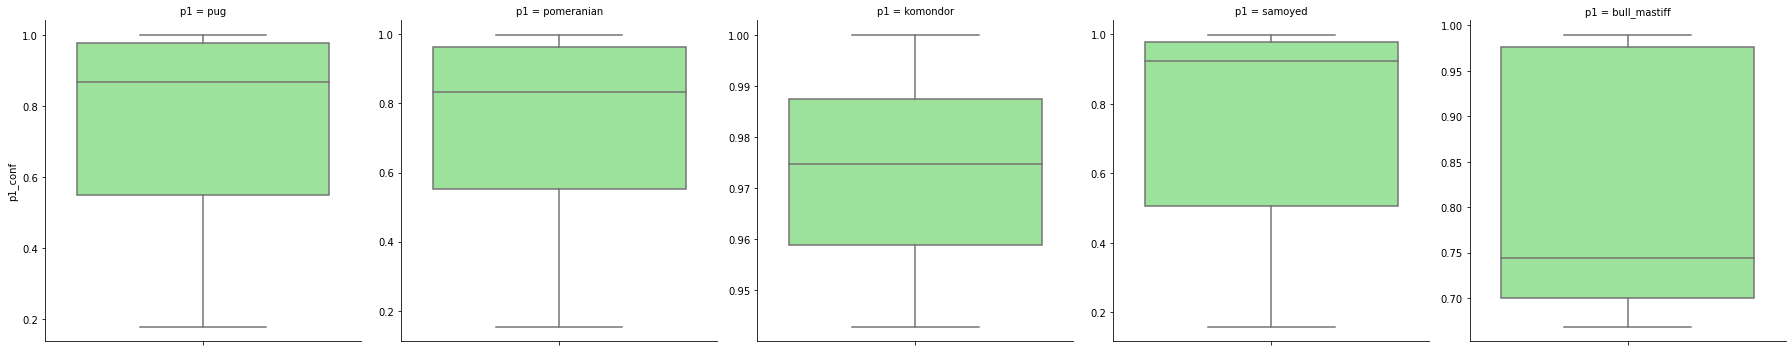

In [47]:
k=df1[['p1','p1_conf']]
df_1=k[k.p1.isin(['komondor','pug','bull_mastiff','pomeranian','samoyed'])]
df_1.head()
sns.catplot(kind='box',col='p1',data=df_1,y='p1_conf',sharey=False,color='lightgreen')

We see that for some breeds the prediction confidence vary lot. It might be due to reason some images clearly depicts the picture of dog while others it is unclear(*bad quality or many uncessary things captured in image*). For eg: in case of **samoyed** has 8th highest mean confidence score(0.75) by the algorithm as seen from the horizontal bar plot, some images of samoyed breed has low score of 0.5 as well as high close to 1.

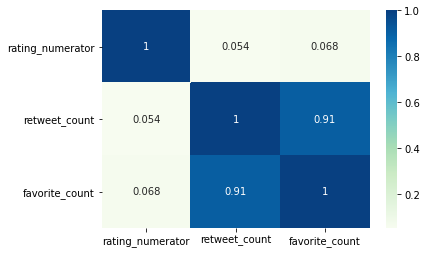

In [48]:
# Lets check the correlation between the rating_numerator, retweet_count, and favorite_count columns
import seaborn as sns
df1_corr=df1[['rating_numerator','retweet_count','favorite_count']].corr()
sns.heatmap(df1_corr,annot=True,cmap='GnBu')

There is high positive correlation between the **retweet_count** and **favorite_count**. Wherehas they hardly have correlation with **rating_numerator** values.

Now will we use hypothesis test to check whether the high correlation we observed between **retweet_count** and **favorite_count** is statistically significant or due to random chance using hypothesis test.

**H0(Null Hypothesis):** There is no correlation between the variables.

**HA(Alternate Hypothesis):** There is significant correlation between the variables.

If the **p-value <0.05** we reject the null hypothesis in favor of alternate hypothesis with **95% significance level**.

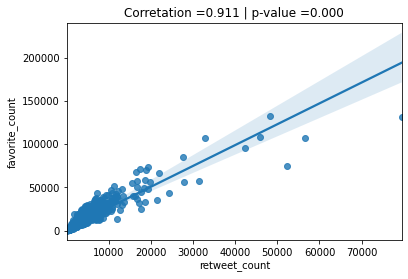

In [49]:
# Checking the significance of correlation between the retweet_count and favorite_count columns
from scipy.stats import pearsonr
t,p=pearsonr(df1['retweet_count'],df1['favorite_count'])
ax=sns.regplot(x='retweet_count',y='favorite_count',data=df1)
text=ax.set_title(f"Corretation ={t:.03f} | p-value ={p:.03f}")

From the above result, null hypothesis rejected thus there is significant correlation between the two variables.

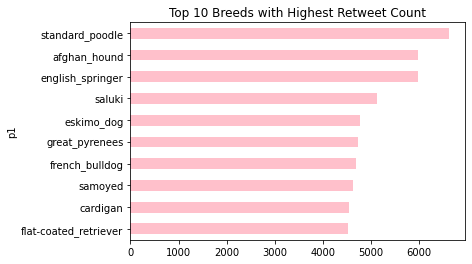

In [50]:
df1.groupby('p1')['retweet_count'].mean().reset_index().sort_values(by='retweet_count',ascending=False)[:10][::-1].plot(kind='barh',x='p1',y='retweet_count',legend=False,color='pink',title='Top 10 Breeds with Highest Retweet Count')

**Standard poodle** has highest retweet count followed by others. Since there is high correlation between **retweet_counts** and **favorite_counts**, those breeds with high **retweet_counts** will also have high **favorite_counts**.

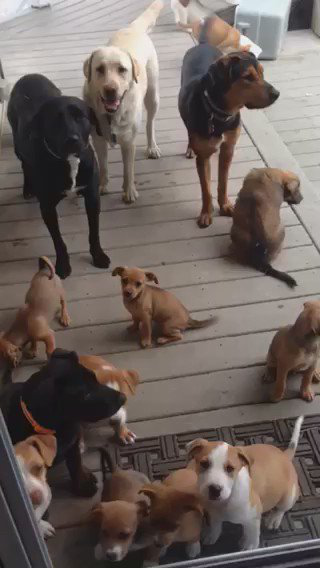

In [51]:
# Viewing the image which had the highest prediction confidence by the algorithm of all
from PIL import Image
import requests
url=df1.sort_values(by='rating_numerator',ascending=False).head(1)['jpg_url'].values.tolist()[0]
im = Image.open(requests.get(url, stream=True).raw)
im

In [52]:
# Checking the values present in timestamd columns
df1.timestamp.unique()

<DatetimeArray>
['2015-11-15 22:32:08+00:00', '2015-11-15 23:05:30+00:00',
 '2015-11-15 23:21:54+00:00', '2015-11-16 00:04:52+00:00',
 '2015-11-16 00:24:50+00:00', '2015-11-16 00:30:50+00:00',
 '2015-11-16 00:49:46+00:00', '2015-11-16 01:01:59+00:00',
 '2015-11-16 01:22:45+00:00', '2015-11-16 01:52:02+00:00',
 ...
 '2017-07-25 16:11:53+00:00', '2017-07-26 00:31:25+00:00',
 '2017-07-26 15:59:51+00:00', '2017-07-27 16:25:51+00:00',
 '2017-07-28 00:22:40+00:00', '2017-07-28 16:27:12+00:00',
 '2017-07-29 00:08:17+00:00', '2017-07-29 16:00:24+00:00',
 '2017-07-31 00:18:03+00:00', '2017-08-01 00:17:27+00:00']
Length: 1477, dtype: datetime64[ns, UTC]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0, 0.5, 'Count')

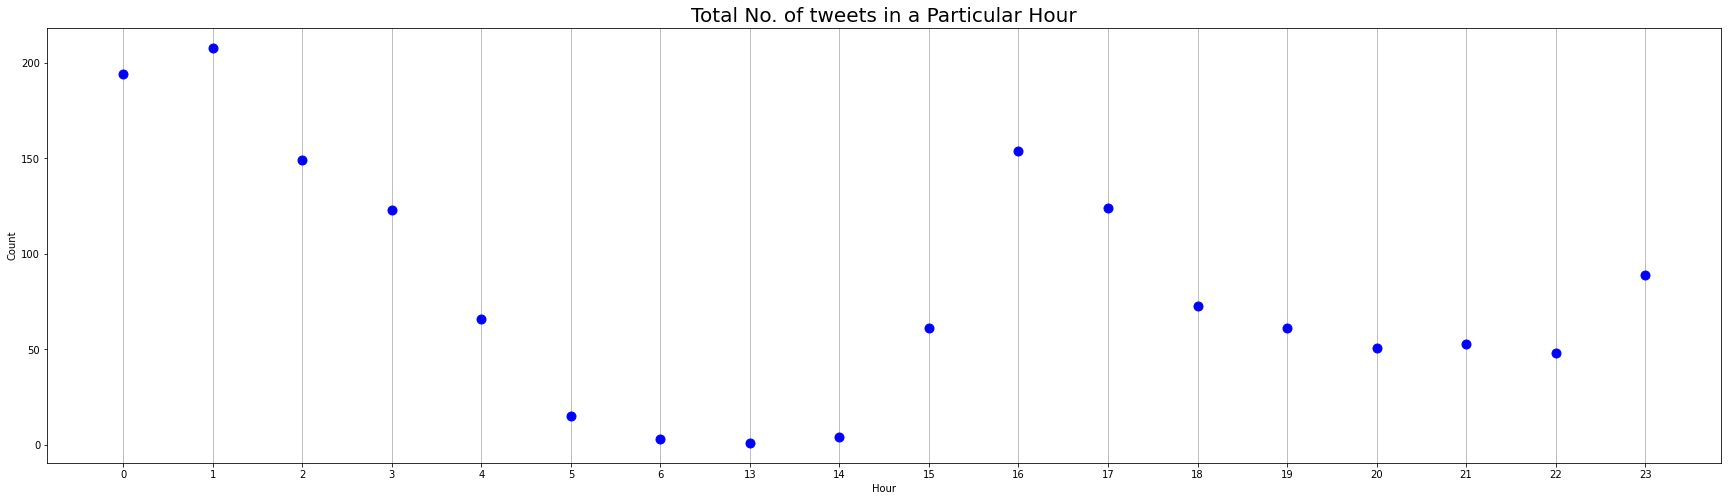

In [53]:
# Plotting the total number of tweets in a particular hour
df1['hour']=df1.timestamp.dt.hour
df1_=df1.hour.value_counts().reset_index().sort_values(by='index')
df1_.head()
import matplotlib.pyplot as plt
plt.figure(figsize=(30,8))
df1_['index']=df1_['index'].astype(str)
plt.errorbar(x=df1_['index'],y=df1_['hour'],fmt='.b',markersize=18)
plt.grid(axis='x')
plt.title('Total No. of tweets in a Particular Hour',fontsize=20)
plt.xlabel('Hour')
plt.ylabel('Count')

We can see that most tweets are posted at 1.00 - 2.00 hrs timeframe, followed by 0.00 - 1.00 hrs and then others . Similarly least are at 5.00 -6.00, 13.00- 15.00 hrs.

So at night from 0.00 to 3.00 hrs  and in evening (16.00) people prefer twitting most whereas at morning(5.00 - 7.00 hrs) and (afternoon 13.00 -15.00 hrs) people tweet the least.

Similarly as above dotplot we want to see, the total counts of tweets monthwise.

In [54]:
# Grouping tweet counts by month
df1_m=df1.timestamp.dt.month_name().value_counts().reset_index().sort_values(by='index')
df1_m

,index,timestamp
7,April,76
11,August,45
0,December,292
3,February,136
2,January,179
5,July,112
6,June,100
4,March,129
8,May,73
1,November,236


As seen in timestamp column, not all the months are present with same frequency. Months like **Jan, Feb** etc are present twice (**2016,2017**) whereas the months like **September** present only once(**2016**). The count begins from mid-November 2015 so the **November** month is taken **1.5** times( **half of 2015 and full of 2016**). So if we just take the count it would be unfair because months with higher frequency will have higher probability of having large counts.

So we will adjust them by dividing respective counts with month frequency. Eg: total Nove counts will be divided by 1.5

In [55]:
for i in range(len(df1_m)):
  if df1_m.iloc[i,0] in ['August','September','October']:
    df1_m.iloc[i,1]=df1_m.iloc[i,1]/1
  elif df1_m.iloc[i,0]=='November':
    df1_m.iloc[i,1]=df1_m.iloc[i,1]/1.5
  else:
    df1_m.iloc[i,1]=df1_m.iloc[i,1]/2

In [56]:
# Adjusted counts
df1_m

,index,timestamp
7,April,38.000000
11,August,45.000000
0,December,146.000000
3,February,68.000000
2,January,89.500000
5,July,56.000000
6,June,50.000000
4,March,64.500000
8,May,36.500000
1,November,157.333333


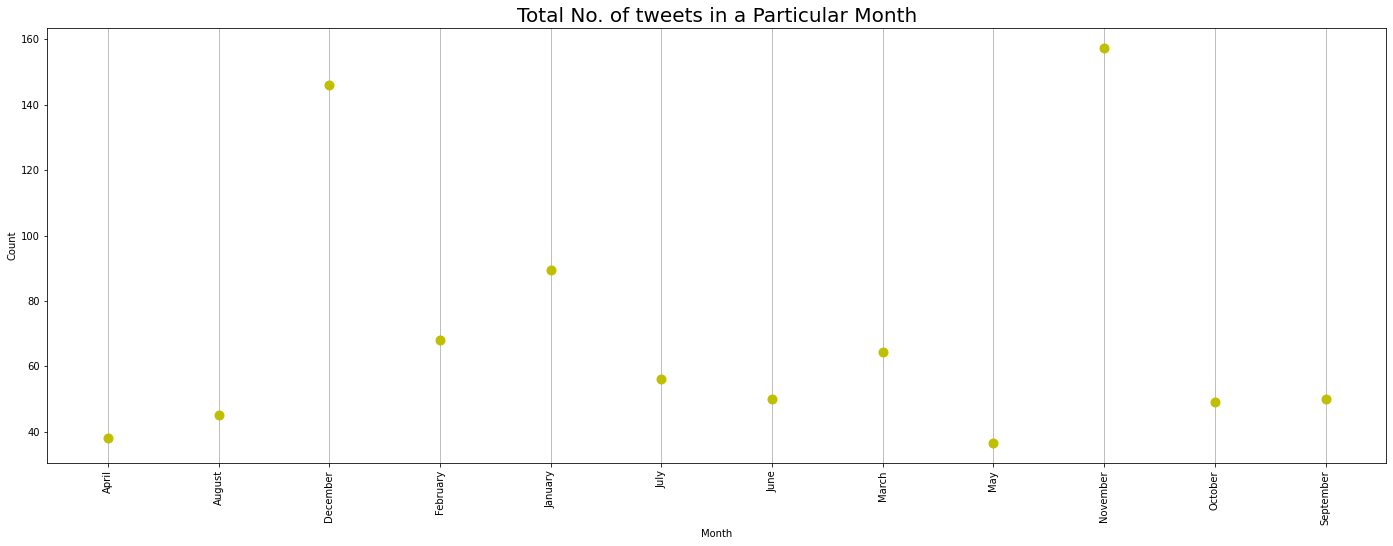

In [57]:
# Plotting adjusted counts month-wise
plt.figure(figsize=(24,8))
plt.errorbar(x=df1_m['index'],y=df1_m['timestamp'],fmt='.y',markersize=18)
g=plt.grid(axis='x')
t=plt.title('Total No. of tweets in a Particular Month',fontsize=20)
plt.xlabel('Month')
plt.ylabel('Count')
x=plt.xticks(rotation=90)

Most tweets are posted in **November** followed by others. Least done in **May, April**.

We will compare the average ratings as well as the two popularity measures(retweet and favorite counts) across the stages.

In [61]:
# Not taking into account those entries which have stage not specified
df__=df1[df1.stage!='0']
df__.head()

,tweet_id,jpg_url,p1,p1_conf,p1_dog,timestamp,text,rating_numerator,name,stage,retweet_count,favorite_count,hour
331,672160042234327040,https://pbs.twimg.com/media/CVP9_beUEAAwURR.jpg,pug,0.561027,True,2015-12-02 21:06:56+00:00,This is Bubba. He's a Titted Peebles Aorta. Evolutionary masterpiece. Comfortable with his body. great pupper,8,Bubba,pupper,395,918,21
339,672254177670729728,https://pbs.twimg.com/media/CVRTmz1WcAA4uMF.jpg,pug,0.979487,True,2015-12-03 03:21:00+00:00,This is Rolf. He's having the time of his life. good pupper,11,Rolf,pupper,800,1515,3
346,672481316919734272,https://pbs.twimg.com/media/CVUiMUeW4AEQgkU.jpg,border_collie,0.599454,True,2015-12-03 18:23:34+00:00,Say hello to Jazz. She should be on the cover of Vogue. gorgeous pupper,12,Jazz,pupper,137,757,18
353,672594978741354496,https://pbs.twimg.com/media/CVWJkJXWsAInlZl.jpg,great_pyrenees,0.755945,True,2015-12-04 01:55:13+00:00,Meet Scott. Just trying to catch his train to work. Doesn't need everybody staring. ignore the haters pupper,9,Scott,pupper,661,1411,1
357,672622327801233409,https://pbs.twimg.com/media/CVWicBbUYAIomjC.jpg,golden_retriever,0.952773,True,2015-12-04 03:43:54+00:00,This lil pupper is sad because we haven't found Kony yet. RT to spread awareness. would pet firmly,12,None,pupper,542,1377,3


In [62]:
df1__=df__.groupby('stage')['rating_numerator','retweet_count','favorite_count'].mean()
df1__

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,rating_numerator,retweet_count,favorite_count
stage,,,
doggo,11.896552,7265.034483,19927.258621
floofer,12.000000,4968.714286,13206.000000
pupper,11.062500,2557.027778,8048.430556
puppo,12.000000,6551.473684,22308.210526


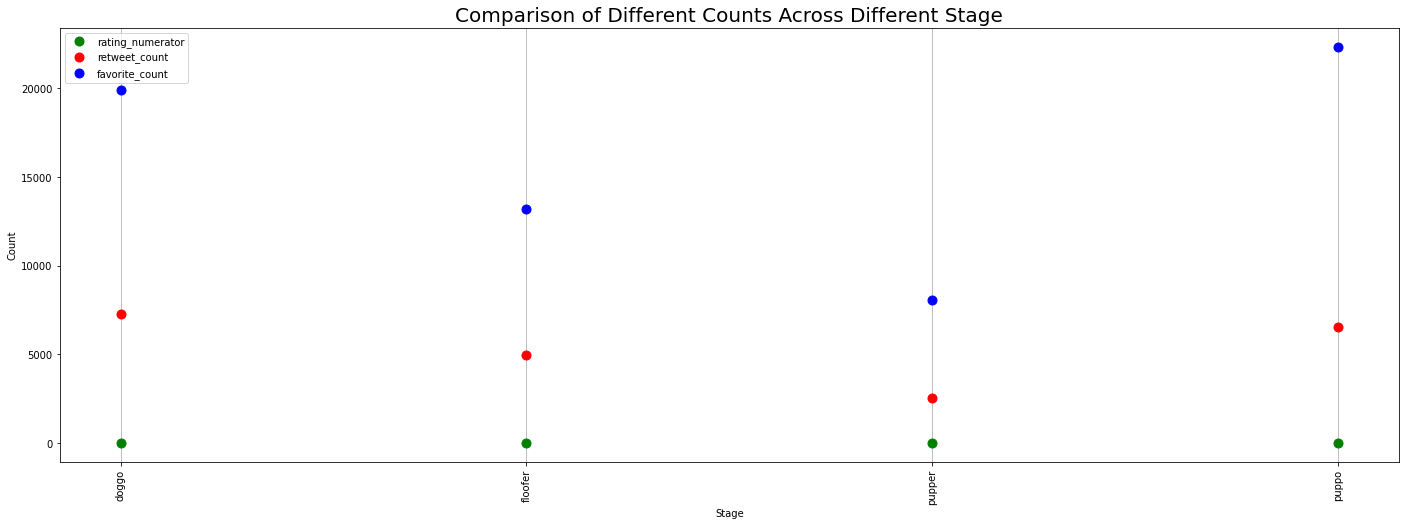

In [68]:
plt.figure(figsize=(24,8))
plt.errorbar(x=df1__.index,y=df1__['rating_numerator'],fmt='.g',markersize=18)
plt.errorbar(x=df1__.index,y=df1__['retweet_count'],fmt='.r',markersize=18)
plt.errorbar(x=df1__.index,y=df1__['favorite_count'],fmt='.b',markersize=18)
g=plt.grid(axis='x')
l=plt.legend(['rating_numerator','retweet_count','favorite_count'])
t=plt.title('Comparison of Different Counts Across Different Stage',fontsize=20)
plt.xlabel('Stage')
plt.ylabel('Count')
x=plt.xticks(rotation=90)

From the table and plot it's evident that the average rating is almost same for all the stages but the two popularity measures(*retweet count & favorite count*) are low for **pupper** and best for **doggo** and **puppo**.

#Conclusions:

1. **Golden Retriever** has the highest number of posts followed by others.

2. **Clumber** has highest average rating followed by other breeds.

3. **Komondor** has highest mean prediction confidence by the algorithm, followed by others. Although in some breeds the prediction confidence varies a lot from image to image.

4. There is a high **significant positive correlation (0.91)** between retweet count and favorite count.

5. We can see that most tweets are posted at 1.00 - 2.00 hrs timeframe, followed by 0.00 - 1.00 hrs and then others . Similarly least are at 5.00 -6.00, 13.00- 15.00 hrs.
So at night from 0.00 to 3.00 hrs  and in evening (16.00) people prefer twitting most whereas at morning(5.00 - 7.00 hrs) and (afternoon 13.00 -15.00 hrs) people tweet the least.

6. Most tweets are posted in **November** followed by **December** and then others others. Least done in **May, April**.

7. Average rating is almost same for all the stages but the two popularity measures are low for **pupper** and best for **doggo and puppo.**

8. **Standard poodle** has highest retweet count followed by others. Since there is high correlation between **retweet_counts** and **favorite_counts**, those breeds with high **retweet_counts** will also have high **favorite_counts**.